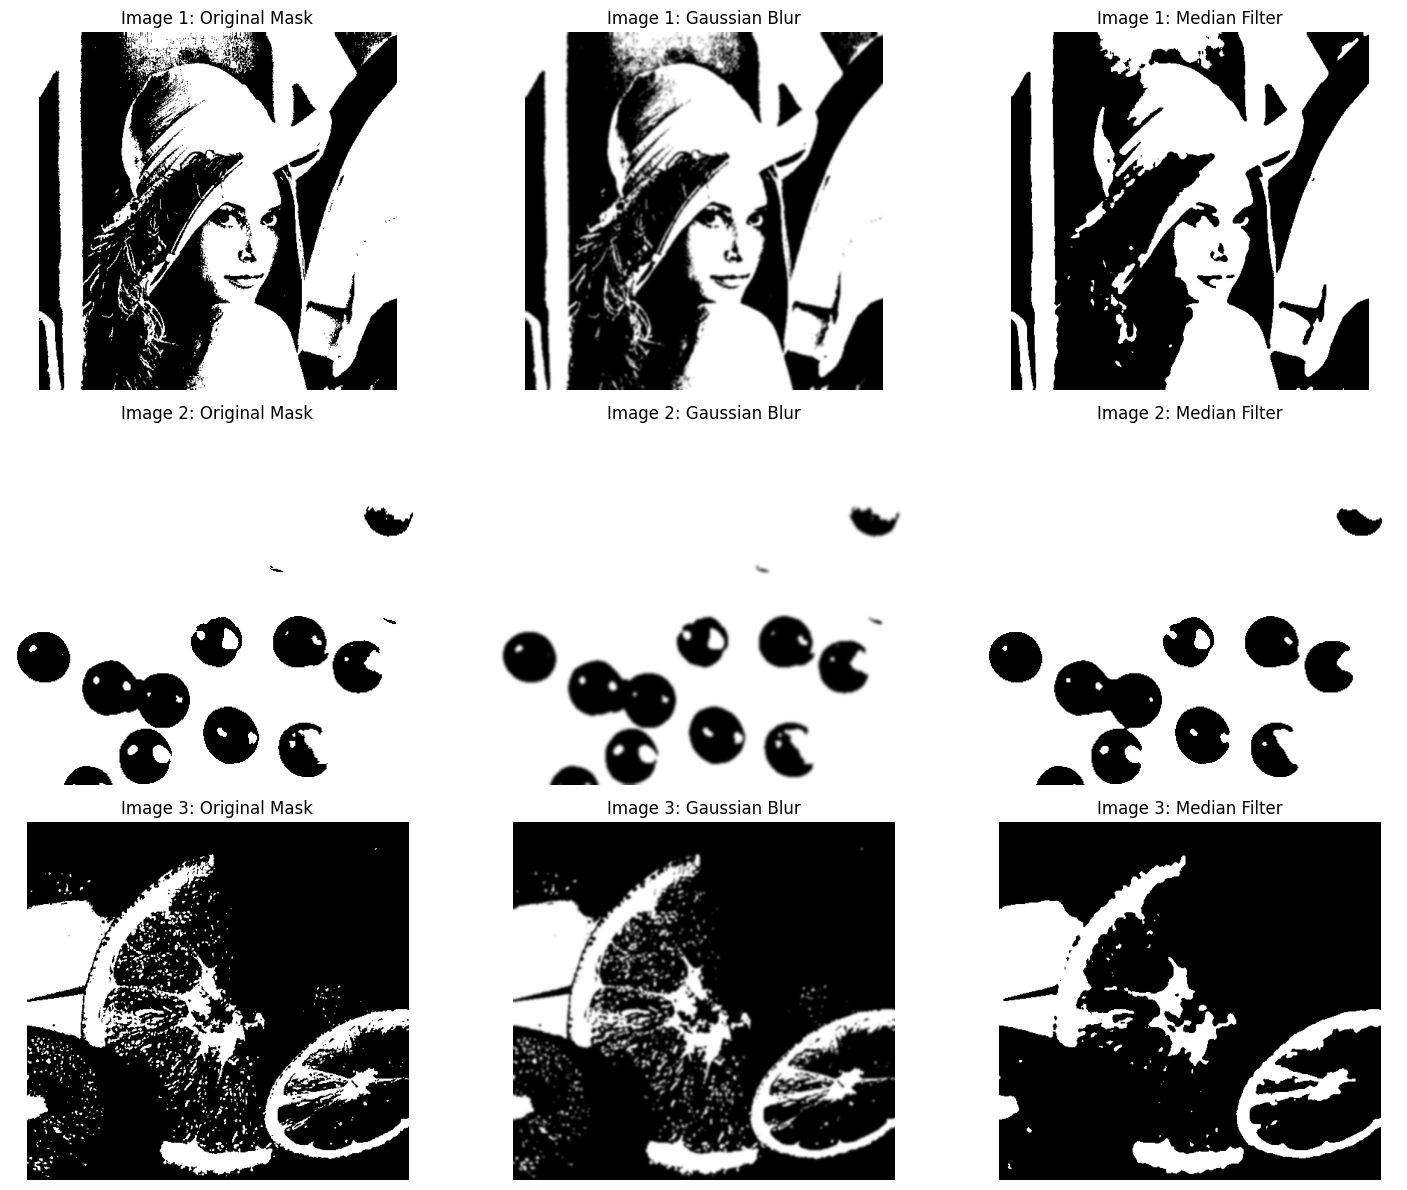

In [ ]:
# --- Import libraries ---
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# --- Function to load image from a working direct URL ---
def url_to_image(url):
    req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    resp = urllib.request.urlopen(req)
    image = np.asarray(bytearray(resp.read()), dtype=np.uint8)
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# --- Step 1: Download working sample images ---
urls = [
    "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg",
    "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/smarties.png",
    "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/fruits.jpg"
]

images = [url_to_image(url) for url in urls]

# --- Step 2: Convert to grayscale and create synthetic 'predicted masks' ---
masks = []
for img in images:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    _, mask = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    masks.append(mask)

# --- Step 3: Apply Gaussian Blur and Median Filter ---
gaussian_blurs = [cv2.GaussianBlur(mask, (7, 7), 0) for mask in masks]
median_filters = [cv2.medianBlur(mask, 7) for mask in masks]

# --- Step 4: Visualize (Original Mask | Gaussian | Median) ---
plt.figure(figsize=(15, 12))

for i in range(len(images)):
    plt.subplot(len(images), 3, i*3 + 1)
    plt.imshow(masks[i], cmap='gray')
    plt.title(f"Image {i+1}: Original Mask")
    plt.axis('off')

    plt.subplot(len(images), 3, i*3 + 2)
    plt.imshow(gaussian_blurs[i], cmap='gray')
    plt.title(f"Image {i+1}: Gaussian Blur")
    plt.axis('off')

    plt.subplot(len(images), 3, i*3 + 3)
    plt.imshow(median_filters[i], cmap='gray')
    plt.title(f"Image {i+1}: Median Filter")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# --- Step 5: Compare mean pixel difference between masks ---
for i in range(len(images)):
    diff_gaussian = np.mean(cv2.absdiff(masks[i], gaussian_blurs[i]))
    diff_median = np.mean(cv2.absdiff(masks[i], median_filters[i]))
    print(f"Image {i+1}:")
    print(f"  Mean pixel diff (Original vs Gaussian): {diff_gaussian:.2f}")
    print(f"  Mean pixel diff (Original vs Median): {diff_median:.2f}\n")


Image 1:
  Mean pixel diff (Original vs Gaussian): 15.65
  Mean pixel diff (Original vs Median): 9.56

Image 2:
  Mean pixel diff (Original vs Gaussian): 4.25
  Mean pixel diff (Original vs Median): 1.18

Image 3:
  Mean pixel diff (Original vs Gaussian): 14.79
  Mean pixel diff (Original vs Median): 11.38

